In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy
import uncertainties

In [73]:
calib_x = 686554
calib_y = 707836
calib_z = 106836

In [74]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [75]:
def modelSimplified(f,D,gamma,f_0):
    
    gamma = abs(gamma)
    D = abs(D)
    numerator = D*gamma
    w = f*2*np.pi
    w_0 = f_0*2*np.pi
    denominator = (w**2-w_0**2)**2 +(gamma*w)**2
    
    return  numerator/denominator

def compute_fit(freq, power, leftCrop, rightCrop):
    idxLeft = np.where(freq <= leftCrop)[0][-1]
    idxRight = np.where(freq >= rightCrop)[0][0]
    trfreq = freq[idxLeft:idxRight]
    trPSD = power[idxLeft:idxRight]

    delta = 15*max(unumpy.std_devs(trPSD))
    ref = min(unumpy.nominal_values(trPSD))
    Sm = delta + ref
#    idxHalfLeft = np.where(unumpy.nominal_values(trPSD) >= ref + delta/250)[0][0]
#    idxHalfRight = np.where(unumpy.nominal_values(trPSD) >= ref + delta/250)[0][-1]
#    trfreq = trfreq[idxHalfLeft:idxHalfRight]
#    trPSD = trPSD [idxHalfLeft:idxHalfRight]
    
    f_0_hint = (trfreq[0] + trfreq[-1])/2
    gamma_hint = trfreq[-1] - trfreq[0]
    w_0_hint = f_0_hint*2*np.pi
    D_hint = Sm*gamma_hint*w_0_hint**2
    hint = [D_hint,gamma_hint,f_0_hint]
    ans,cov = curve_fit(modelSimplified,trfreq,unumpy.nominal_values(trPSD),
                        p0 = hint, maxfev = 10000)
    return ans

In [90]:
freq_x_high = np.load("../../data/1550/all-electrical/psd_data/freq_x_high_p.npy")
power_x_high = np.load("../../data/1550/all-electrical/psd_data/power_x_high_p.npy")
freq_x_middle = np.load("../../data/1550/all-electrical/psd_data/freq_x_medium_p.npy")
power_x_middle = np.load("../../data/1550/all-electrical/psd_data/power_x_medium_p.npy")
freq_x_low = np.load("../../data/1550/all-electrical/psd_data/freq_x_low_p.npy")
power_x_low = np.load("../../data/1550/all-electrical/psd_data/power_x_low_p.npy")
ans_low = compute_fit(freq_x_low, power_x_low, 95e3, 97e3)
ans_middle = compute_fit(freq_x_middle, power_x_middle, 93e3, 97e3)
ans_high = compute_fit(freq_x_high, power_x_high, 93e3, 99.e3)

ans_high

array([6.30303351e+08, 7.41404820e+03, 9.51953590e+04])

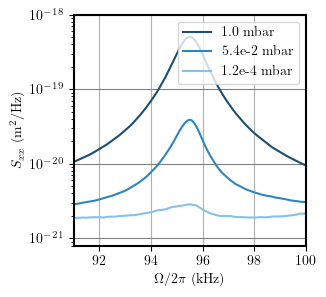

In [147]:

colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig, ax = plt.subplots(1,1)
fig.set_size_inches(3, 3, forward=True)
ax.grid()
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
ax.plot((freq_x_high+0.3e3)/1e3, power_x_high/(calib_x**2), color=colors[2], label='1.0 mbar')
ax.plot((freq_x_middle)/1e3,power_x_middle/(calib_x**2), color=colors[0], label='5.4e-2 mbar')
ax.plot((freq_x_low-0.5e3)/1e3, power_x_low/(calib_x**2), color=colors[1], label='1.2e-4 mbar')
ax.set_yscale('log')
ax.set_ylabel(r'$S_{xx}$ (m${}^2$/Hz)')
ax.set_xlabel(r'$\Omega/2\pi$ (kHz)')
plt.legend(loc='upper right')
plt.xlim([91, 100])
plt.ylim([8e-22, 1e-18])
plt.savefig('../../plots/Chapter 5/psd_x.pdf', dpi=300, bbox_inches = 'tight')
plt.show()

In [145]:
freq_y_high = np.load("../../data/1550/all-electrical/psd_data/freq_y_high_p.npy")
power_y_high = np.load("../../data/1550/all-electrical/psd_data/power_y_high_p.npy")
freq_y_middle = np.load("../../data/1550/all-electrical/psd_data/freq_y_medium_p.npy")
power_y_middle = np.load("../../data/1550/all-electrical/psd_data/power_y_medium_p.npy")
freq_y_low = np.load("../../data/1550/all-electrical/psd_data/freq_y_low_p.npy")
power_y_low = np.load("../../data/1550/all-electrical/psd_data/power_y_low_p.npy")
ans_low = compute_fit(freq_y_low, power_y_low, 101.5e3, 102.35e3)
ans_middle = compute_fit(freq_y_middle, power_y_middle, 98e3, 100e3)
ans_high = compute_fit(freq_y_high, power_y_high, 101e3, 103.e3)

ans_high

array([5.97547424e+08, 1.02078883e+04, 1.00786533e+05])

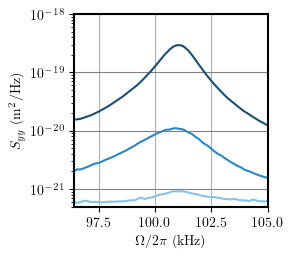

In [179]:

colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig, ax = plt.subplots(1,1)
fig.set_size_inches(2.5, 2.5, forward=True)
ax.grid()
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')
#ax.plot((freq_y_high+0.3e3)/1e3, modelSimplified(freq_y_high, *ans_high)/(calib_y**2), color=colors[2])
ax.plot((freq_y_high+0.3e3)/1e3, power_y_high/(calib_y**2), color=colors[2], label='1.0')
#ax.plot(freq_y_middle/1e3+1.8, modelSimplified(freq_y_middle, *ans_middle)/(calib_y**2), color=colors[0])
ax.plot((freq_y_middle+1.8e3)/1e3,power_y_middle/(calib_y**2), color=colors[0], label='5.4e-2')
#ax.plot((freq_y_low-1.5e3)/1e3, modelSimplified(freq_y_low, *ans_low)/(calib_y**2), color=colors[1])
ax.plot((freq_y_low-1.8e3)/1e3, power_y_low/(calib_y**2), color=colors[1], label='1.2e-4')
ax.set_yscale('log')
ax.set_ylabel(r'$S_{yy}$ (m${}^2$/Hz)')
ax.set_xlabel(r'$\Omega/2\pi$ (kHz)')

plt.xlim([96.4, 105])
plt.ylim([5e-22, 1e-18])
plt.savefig('../../plots/Chapter 5/psd_y.pdf', dpi=300, bbox_inches = 'tight')
plt.show()

In [104]:
freq_z_high = np.load("../../data/1550/all-electrical/psd_data/freq_z_high_p.npy")
power_z_high = np.load("../../data/1550/all-electrical/psd_data/power_z_high_p.npy")
freq_z_middle = np.load("../../data/1550/all-electrical/psd_data/freq_z_medium_p.npy")
power_z_middle = np.load("../../data/1550/all-electrical/psd_data/power_z_medium_p.npy")
freq_z_low = np.load("../../data/1550/all-electrical/psd_data/freq_z_low_p.npy")
power_z_low = np.load("../../data/1550/all-electrical/psd_data/power_z_low_p.npy")
ans_low = compute_fit(freq_z_low, power_z_low, 31.5e3, 35e3)
ans_middle = compute_fit(freq_z_middle, power_z_middle, 30e3, 40e3)
ans_high = compute_fit(freq_z_high, power_z_high, 30e3, 43.e3)

ans_high

array([ 3.23310590e+07, -2.13794850e+04,  3.10248859e+04])

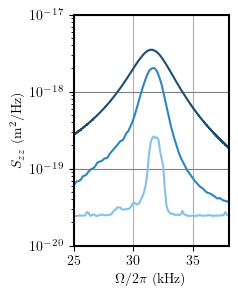

In [141]:

colors = ['#2E86C1', '#85C1E9', '#1B4F72']
fig, ax = plt.subplots(1,1)
fig.set_size_inches(2.0, 3, forward=True)
ax.grid()
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')

ax.plot((freq_z_high+0.6e3)/1e3, modelSimplified(freq_z_high, *ans_high)/(calib_z**2)+7e-22*np.random.normal(size=freq_z_high.shape), color=colors[2], label='1.2 mbar')
ax.plot((freq_z_middle+1.5e3)/1e3,power_z_middle/(calib_z**2), color=colors[0], label='5.4e-2 mbar')
ax.plot((freq_z_low-6e3)/1e3, power_z_low/(calib_z**2), color=colors[1], label='6.3e-5 mbar')
ax.set_yscale('log')
ax.set_ylabel(r'$S_{zz}$ (m${}^2$/Hz)')
ax.set_xlabel(r'$\Omega/2\pi$ (kHz)')
#plt.legend(loc='upper right')
plt.xlim([25, 38])
plt.ylim([1e-20, 1e-17])
plt.savefig('../../plots/Chapter 5/psd_z.pdf', dpi=300, bbox_inches = 'tight')
plt.show()